## IMPORTS


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holidays
from pytz import timezone
import regex as re
from datetime import datetime, timedelta
from dash import Dash, html, dcc
import plotly.express as px
import plotly.subplots as sp
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.colors as pc

## PREPROCESSING PT.1

In [3]:
df_preprocessing = pd.read_csv('depi.csv')

/var/folders/rd/rm1ghq0950j6l712s6ykcc5w0000gn/T/ipykernel_7431/1904379713.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_preprocessing = pd.read_csv('depi.csv')


In [4]:
df_preprocessing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80511 entries, 0 to 80510
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Name                         80511 non-null  object 
 1   Financial Status             24894 non-null  object 
 2   Paid at                      15806 non-null  object 
 3   Fulfillment Status           24894 non-null  object 
 4   Fulfilled at                 14829 non-null  object 
 5   Currency                     24894 non-null  object 
 6   Subtotal                     24894 non-null  float64
 7   Shipping                     24894 non-null  float64
 8   Taxes                        24894 non-null  float64
 9   Total                        24894 non-null  float64
 10  Discount Amount              24894 non-null  float64
 11  Shipping Method              23678 non-null  object 
 12  Created at                   80511 non-null  object 
 13  Lineitem quantit

In [5]:
df_preprocessing.describe()

Subtotal      Shipping    Taxes         Total  Discount Amount  \
count  24894.000000  24894.000000  24894.0  24894.000000     24894.000000   
mean    1800.314196     44.305841      0.0   1844.648156       426.802867   
std     2157.777693     45.789890      0.0   2151.154461      1064.760566   
min        0.000000      0.000000      0.0      0.000000         0.000000   
25%      615.000000      0.000000      0.0    660.000000         0.000000   
50%     1189.000000     50.000000      0.0   1210.000000         0.000000   
75%     2200.000000     60.000000      0.0   2230.000000       400.000000   
max    54091.000000    703.000000      0.0  54091.000000     55837.340000   

       Lineitem quantity  Lineitem price  Lineitem compare at price  \
count       80511.000000    80511.000000               54219.000000   
mean            1.379700      572.448623                 594.279383   
std             1.147936      607.131281                 864.102863   
min             1.000000        0.000000                   0.000000   
25%             1.000000      200.000000                   0.000000   
50%             1.000000      372.000000                 285.000000   
75%             1.000000      700.000000                 730.000000   
max           100.000000    15602.740000               15602.740000   

       Refunded Amount  Lineitem discount  ...  Tax 1 Value  Tax 2 Name  \
count     24894.000000       80511.000000  ...          0.0         0.0   
mean         18.398876         126.960674  ...          NaN         NaN   
std         216.012285         380.948653  ...          NaN         NaN   
min           0.000000           0.000000  ...          NaN         NaN   
25%           0.000000           0.000000  ...          NaN         NaN   
50%           0.000000           0.000000  ...          NaN         NaN   
75%           0.000000           0.000000  ...          NaN         NaN   
max       10150.000000       11467.000000  ...          NaN         NaN   

       Tax 2 Value  Tax 3 Name  Tax 3 Value  Tax 4 Name  Tax 4 Value  \
count          0.0         0.0          0.0         0.0          0.0   
mean           NaN         NaN          NaN         NaN          NaN   
std            NaN         NaN          NaN         NaN          NaN   
min            NaN         NaN          NaN         NaN          NaN   
25%            NaN         NaN          NaN         NaN          NaN   
50%            NaN         NaN          NaN         NaN          NaN   
75%            NaN         NaN          NaN         NaN          NaN   
max            NaN         NaN          NaN         NaN          NaN   

       Tax 5 Name  Tax 5 Value  Duties  
count         0.0          0.0     0.0  
mean          NaN          NaN     NaN  
std           NaN          NaN     NaN  
min           NaN          NaN     NaN  
25%           NaN          NaN     NaN  
50%           NaN          NaN     NaN  
75%           NaN          NaN     NaN  
max           NaN          NaN     NaN  

[8 rows x 21 columns]

In [6]:

columns = df_preprocessing.columns[df_preprocessing.notna().sum() == 0]
columns

Index(['Tax 1 Name', 'Tax 1 Value', 'Tax 2 Name', 'Tax 2 Value', 'Tax 3 Name',
       'Tax 3 Value', 'Tax 4 Name', 'Tax 4 Value', 'Tax 5 Name', 'Tax 5 Value',
       'Duties'],
      dtype='object')

In [7]:
df_preprocessing.drop(columns, axis=1, inplace=True)

In [8]:
columns = df_preprocessing.columns[df_preprocessing.notna().sum() == 0]
columns

Index([], dtype='object')

In [9]:

billing_columns = df_preprocessing.columns[df_preprocessing.columns.str.contains('Billing')]
billing_columns

Index(['Billing City', 'Billing Zip', 'Billing Province', 'Billing Country',
       'Billing Province Name'],
      dtype='object')

In [10]:
df_preprocessing.drop(billing_columns, axis=1, inplace=True)

In [11]:
billing_columns = df_preprocessing.columns[df_preprocessing.columns.str.contains('Billing')]
billing_columns

Index([], dtype='object')

In [12]:
columns_to_drop = ['Source','Risk Level','Tags','Shipping Country','Shipping City','Lineitem fulfillment status','Lineitem taxable','Lineitem requires shipping','Taxes','Currency','Fulfilled at','Fulfillment Status','Paid at','Financial Status']

df_preprocessing.drop(columns_to_drop, axis=1, inplace=True)

In [13]:
df_preprocessing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80511 entries, 0 to 80510
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       80511 non-null  object 
 1   Subtotal                   24894 non-null  float64
 2   Shipping                   24894 non-null  float64
 3   Total                      24894 non-null  float64
 4   Discount Amount            24894 non-null  float64
 5   Shipping Method            23678 non-null  object 
 6   Created at                 80511 non-null  object 
 7   Lineitem quantity          80511 non-null  int64  
 8   Lineitem name              80511 non-null  object 
 9   Lineitem price             80511 non-null  float64
 10  Lineitem compare at price  54219 non-null  float64
 11  Lineitem sku               78634 non-null  object 
 12  Shipping Province          24741 non-null  object 
 13  Cancelled at               3361 non-null   obj

In [14]:
# Forward-fill order-level details
order_columns = ["Subtotal", "Shipping", "Total", "Discount Amount", "Shipping Method",
                 "Shipping Province", "Shipping Province Name", "Payment Method", "Created at"]
df_preprocessing[order_columns] = df_preprocessing[order_columns].fillna(method="ffill")

# Group by Order ID, concatenating item names and quantities
df_grouped = df_preprocessing.groupby("Name").agg({
    "Created at": "first",  # Take the first value
    "Subtotal": "first",
    "Shipping": "first",
    "Total": "first",
    "Discount Amount": "first",
    "Shipping Method": "first",
    "Shipping Province": "first",
    "Shipping Province Name": "first",
    "Payment Method": "first",
    "Lineitem name": lambda x: ", ".join(x),  # Join all items into one column
    "Lineitem price": lambda x: ", ".join(map(str, x)),  # Join all prices
    "Lineitem compare at price": lambda x: ", ".join(map(str, x)),  # Join all compare at prices
    "Lineitem sku": lambda x: ", ".join(map(str, x)),  # Join all SKUs
    "Lineitem quantity": lambda x: ", ".join(map(str, x)), # Join all quantities
    "Lineitem discount": lambda x: ", ".join(map(str, x)),  # Join all discounts
    "Cancelled at": "first",
    "Refunded Amount": "first"
}).reset_index()

# df_grouped.to_csv("depi_grouped.csv", index=False)

/var/folders/rd/rm1ghq0950j6l712s6ykcc5w0000gn/T/ipykernel_7431/2487628572.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_preprocessing[order_columns] = df_preprocessing[order_columns].fillna(method="ffill")


## Functions

In [15]:
eg_holidays = holidays.EG(language='en_US')

def count_items_in_order(lineitem_Qty):
    return sum([int(x) for x in lineitem_Qty])

def get_holiday_name(date):
    return eg_holidays.get(date)

def get_holiday_dates(year):
    holiday_dates = {}
    
    holiday_dates['Christmas'] = datetime(year, 12, 25)
    holiday_dates['Valentine\'s Day'] = datetime(year, 2, 14)
    holiday_dates['Mother\'s Day'] = datetime(year, 3, 21)

    holiday_dates['Black Friday'] = get_nth_weekday_of_month(year, 11, 3, 5)

    
    return holiday_dates
def is_ramadan(date_series):
    ramadan_dates = {
        2022: {'start': '2022-04-02', 'end': '2022-05-01'},
        2023: {'start': '2023-03-23', 'end': '2023-04-21'},
        2024: {'start': '2024-03-11', 'end': '2024-04-09'},
        2025: {'start': '2025-03-01', 'end': '2025-03-30'}
    }
    
    result = pd.Series(0, index=date_series.index)
    
    for year, dates in ramadan_dates.items():
        start = pd.to_datetime(dates['start'],utc=True).tz_convert('Africa/Cairo')
        end = pd.to_datetime(dates['end'],utc=True).tz_convert('Africa/Cairo')
        mask = (date_series >= start) & (date_series <= end)
        result[mask] = 1
        
    return result

def is_eid(date_series):
    eid_dates = {
        2022: {
            'eid_al_fitr_start': '2022-05-02', 'eid_al_fitr_end': '2022-05-04',
            'eid_al_adha_start': '2022-07-09', 'eid_al_adha_end': '2022-07-12'
        },
        2023: {
            'eid_al_fitr_start': '2023-04-22', 'eid_al_fitr_end': '2023-04-24',
            'eid_al_adha_start': '2023-06-28', 'eid_al_adha_end': '2023-07-01'
        },
        2024: {
            'eid_al_fitr_start': '2024-04-10', 'eid_al_fitr_end': '2024-04-12',
            'eid_al_adha_start': '2024-06-16', 'eid_al_adha_end': '2024-06-19'
        },
        2025: {
            'eid_al_fitr_start': '2025-03-31', 'eid_al_fitr_end': '2025-04-02',
            'eid_al_adha_start': '2025-06-06', 'eid_al_adha_end': '2025-06-09'
        }
    }
    
    result = pd.Series(0, index=date_series.index)
    
    for year, dates in eid_dates.items():
        fitr_start = pd.to_datetime(dates['eid_al_fitr_start'])
        fitr_end = pd.to_datetime(dates['eid_al_fitr_end'])
        fitr_mask = (date_series >= fitr_start) & (date_series <= fitr_end)
        
        adha_start = pd.to_datetime(dates['eid_al_adha_start'])
        adha_end = pd.to_datetime(dates['eid_al_adha_end'])
        adha_mask = (date_series >= adha_start) & (date_series <= adha_end)
        
        combined_mask = fitr_mask | adha_mask
        result[combined_mask] = 1
        
    return result


def get_nth_weekday_of_month(year, month, weekday, n):
    date = datetime(year, month, 1)
    
    days_until_first = (weekday - date.weekday()) % 7
    first_occurrence = date + timedelta(days=days_until_first)
    
    result = first_occurrence + timedelta(days=7 * (n - 1))
    
    return result

def days_to_next_holiday(date, holidays_dict):
    if not isinstance(date, datetime):
        date = pd.to_datetime(date)
    
    # Find the next holiday
    future_holidays = {name: holiday_date for name, holiday_date in holidays_dict.items() if holiday_date >= date}
    
    # If no future holidays in current year, look at next year
    if not future_holidays:
        next_year_holidays = get_holiday_dates(date.year + 1)
        next_holiday_name = min(next_year_holidays, key=lambda x: next_year_holidays[x])
        next_holiday_date = next_year_holidays[next_holiday_name]
    else:
        next_holiday_name = min(future_holidays, key=lambda x: future_holidays[x])
        next_holiday_date = future_holidays[next_holiday_name]
    
    # Calculate days difference
    days_difference = (next_holiday_date - date).days
    
    return days_difference, next_holiday_name

def calculate_days_to_next_shopping_holiday(dates):
    """Calculate days to next shopping holiday for a series of dates."""
    # Pre-compute holiday dates for relevant years
    years_range = range(pd.to_datetime(min(dates)).year, pd.to_datetime(max(dates)).year + 2)
    holiday_dates_by_year = {year: get_holiday_dates(year) for year in years_range}
    
    days_list, next_holiday_list = [], []
    
    for date in dates:
        date_dt = pd.to_datetime(date).tz_localize(None) if hasattr(pd.to_datetime(date), 'tz') else pd.to_datetime(date)
        year = date_dt.year
        
        future_holidays = {name: date for name, date in holiday_dates_by_year[year].items() if date >= date_dt}
        
        if not future_holidays:
            # Look at next year if no future holidays in current year
            next_year = holiday_dates_by_year[year + 1]
            next_holiday = min(next_year.items(), key=lambda x: x[1])
        else:
            next_holiday = min(future_holidays.items(), key=lambda x: x[1])
        
        days_list.append((next_holiday[1] - date_dt).days)
        next_holiday_list.append(next_holiday[0])
    
    return pd.Series(days_list), pd.Series(next_holiday_list)



In [16]:
eg_holidays

holidays.country_holidays('EG')

In [17]:
df = pd.read_csv('depi_grouped.csv')

## PREPROCESSING PT.2

In [18]:
df.head()

Name                 Created at  Subtotal  Shipping   Total  \
0  #MC14035  2022-11-01 00:32:29 +0200    1150.0       0.0  1150.0   
1  #MC14036  2022-11-01 04:58:48 +0200     620.0      50.0   670.0   
2  #MC14037  2022-11-01 07:49:44 +0200     440.0      50.0   490.0   
3  #MC14038  2022-11-01 08:08:38 +0200     600.0      50.0   650.0   
4  #MC14039  2022-11-01 08:21:14 +0200     408.0      50.0   458.0   

   Discount Amount Shipping Method Shipping Province Shipping Province Name  \
0             95.0   Free Shipping                 C                  Cairo   
1              0.0   Shipping Rate                 C                  Cairo   
2              0.0   Shipping Rate                GZ                   Giza   
3              0.0   Shipping Rate                 C                  Cairo   
4              0.0   Shipping Rate                 C                  Cairo   

           Payment Method                                      Lineitem name  \
0  Cash on Delivery (COD)  Hand Towels ( 30cm x 30 cm ) - 30x30 / Off Whi...   
1  Cash on Delivery (COD)  Bath mat towel ( foot pattern ) size 50x70 - 5...   
2  Cash on Delivery (COD)           MATTRESS TOPPER - 160x200 / White / 5 cm   
3  Cash on Delivery (COD)                          Plain Bathrobe - M / Navy   
4  Cash on Delivery (COD)             Face Towel 60x120 - 60x120 / off white   

                          Lineitem price     Lineitem compare at price  \
0  35.0, 115.0, 115.0, 120.0, 95.0, 95.0  nan, nan, nan, nan, nan, nan   
1                           130.0, 360.0                      nan, 0.0   
2                                  440.0                           0.0   
3                                  600.0                           0.0   
4                                   68.0                         135.0   

                                        Lineitem sku  Lineitem quantity  \
0  2017982, 2017976, 2017976, 2020742, 2020741, 2...  10, 2, 1, 3, 1, 1   
1                             2018550, 2013627-white               2, 1   
2                                      2021306-white                  1   
3                                       2016626-Navy                  1   
4                                  2013822-off white                  6   

               Lineitem discount Cancelled at  Refunded Amount  
0  0.0, 0.0, 0.0, 0.0, 0.0, 95.0          NaN              0.0  
1                       0.0, 0.0          NaN              0.0  
2                            0.0          NaN              0.0  
3                            0.0          NaN              0.0  
4                            0.0          NaN              0.0

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24894 entries, 0 to 24893
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       24894 non-null  object 
 1   Created at                 24894 non-null  object 
 2   Subtotal                   24894 non-null  float64
 3   Shipping                   24894 non-null  float64
 4   Total                      24894 non-null  float64
 5   Discount Amount            24894 non-null  float64
 6   Shipping Method            24894 non-null  object 
 7   Shipping Province          24894 non-null  object 
 8   Shipping Province Name     24894 non-null  object 
 9   Payment Method             24894 non-null  object 
 10  Lineitem name              24894 non-null  object 
 11  Lineitem price             24894 non-null  object 
 12  Lineitem compare at price  22657 non-null  object 
 13  Lineitem sku               24856 non-null  obj

In [20]:
df.isnull().sum()

Name                             0
Created at                       0
Subtotal                         0
Shipping                         0
Total                            0
Discount Amount                  0
Shipping Method                  0
Shipping Province                0
Shipping Province Name           0
Payment Method                   0
Lineitem name                    0
Lineitem price                   0
Lineitem compare at price     2237
Lineitem sku                    38
Lineitem quantity                0
Lineitem discount                0
Cancelled at                 21533
Refunded Amount                  0
dtype: int64

In [21]:
df[df['Lineitem sku'].isnull()]

Name                 Created at  Subtotal  Shipping    Total  \
3507   #MC17545  2023-03-25 11:33:55 +0200    1022.0       0.0   1022.0   
4006   #MC18044  2023-04-24 04:23:13 +0200     399.0      50.0    449.0   
4014   #MC18052  2023-04-24 14:57:00 +0200     239.0      50.0    289.0   
4015   #MC18053  2023-04-24 15:07:21 +0200     285.0      50.0    335.0   
4132   #MC18170  2023-05-03 19:05:50 +0300     399.0      50.0    449.0   
4235   #MC18273  2023-05-11 10:49:48 +0300    1368.0      50.0   1418.0   
4263   #MC18301  2023-05-14 11:40:21 +0300    1150.0      50.0   1200.0   
4271   #MC18309  2023-05-15 12:22:58 +0300    1400.0      50.0   1450.0   
4361   #MC18399  2023-05-25 19:55:03 +0300     930.0      50.0    980.0   
4514   #MC18552  2023-06-04 03:04:41 +0300     945.0      50.0    995.0   
4597   #MC18635  2023-06-08 13:52:28 +0300     930.0      50.0    980.0   
5036   #MC19074  2023-07-07 12:30:07 +0300     600.0      50.0    650.0   
5135   #MC19173  2023-07-11 15:43:19 +0300      90.0      90.0    180.0   
5201   #MC19239  2023-07-13 12:18:54 +0300     360.0      50.0    410.0   
5261   #MC19299  2023-07-14 23:41:22 +0300     280.0      50.0    330.0   
5395   #MC19433  2023-07-20 14:52:50 +0300    1250.0      50.0   1300.0   
5403   #MC19441  2023-07-20 18:04:13 +0300    1400.0      50.0   1450.0   
5896   #MC19934  2023-08-17 12:00:14 +0300     400.0      50.0    450.0   
6173   #MC20211  2023-09-02 05:57:42 +0300     250.0      60.0    310.0   
6249   #MC20287  2023-09-06 14:12:43 +0300    2000.0      60.0   2060.0   
6514   #MC20552  2023-09-21 14:05:32 +0300     500.0      60.0    560.0   
6538   #MC20576  2023-09-22 12:07:28 +0300    2500.0     150.0   2650.0   
6550   #MC20588  2023-09-22 21:06:59 +0300    2000.0      60.0   2060.0   
6555   #MC20593  2023-09-22 22:49:24 +0300    2500.0     150.0   2650.0   
6593   #MC20631  2023-09-24 16:36:16 +0300    1000.0     200.0   1200.0   
6924   #MC20962  2023-10-07 17:48:04 +0300   50000.0       0.0  50000.0   
6926   #MC20964  2023-10-07 18:54:09 +0300     500.0       0.0    500.0   
7068   #MC21106  2023-10-12 12:39:41 +0300    1300.0     150.0   1450.0   
7090   #MC21128  2023-10-12 23:13:03 +0300    1500.0     200.0   1700.0   
7326   #MC21364  2023-10-25 12:29:58 +0300    1500.0     150.0   1650.0   
19162  #MC35055  2024-10-02 22:59:49 +0300    1050.0      60.0   1110.0   
19474  #MC35367  2024-10-11 21:36:37 +0300     900.0      60.0    960.0   
19581  #MC35474  2024-10-13 20:12:56 +0300     900.0      60.0    960.0   
19727  #MC35620  2024-10-17 22:24:00 +0300     712.5      60.0    772.5   
19792  #MC35685  2024-10-19 18:41:34 +0300    1050.0      60.0   1110.0   
19811  #MC35704  2024-10-20 12:02:08 +0300    1050.0      60.0   1110.0   
19861  #MC35754  2024-10-22 07:00:47 +0300    1050.0      60.0   1110.0   
21693  #MC37586  2024-11-25 16:04:44 +0200    1500.0       0.0   1500.0   

       Discount Amount Shipping Method Shipping Province  \
3507               0.0   Free Shipping                SU   
4006               0.0   Shipping Rate                 C   
4014               0.0   Shipping Rate                 C   
4015               0.0   Shipping Rate                 C   
4132               0.0   Shipping Rate                SU   
4235               0.0   Shipping Rate                 C   
4263               0.0   Shipping Rate                 C   
4271               0.0   Shipping Rate                HU   
4361               0.0   Shipping Rate                SU   
4514               0.0   Shipping Rate                 C   
4597               0.0   Shipping Rate                 C   
5036               0.0   Shipping Rate                 C   
5135               0.0  Shipping Rates                DK   
5201               0.0   Shipping Rate                 C   
5261               0.0   Shipping Rate                 C   
5395               0.0   Shipping Rate                GZ   
5403               0.0   Shipping Rate                GZ   
5896 

In [22]:
# Drop remaining rows with null SKUs
null_count_before = df['Lineitem sku'].isnull().sum()
df = df.dropna(subset=['Lineitem sku'])
null_count_after = df['Lineitem sku'].isnull().sum()

print(f"Null SKUs before: {null_count_before}")
print(f"Null SKUs after: {null_count_after}")
print(f"Rows dropped: {null_count_before - null_count_after}")



Null SKUs before: 38
Null SKUs after: 0
Rows dropped: 38


In [23]:
df.describe()

Subtotal      Shipping         Total  Discount Amount  \
count  24856.000000  24856.000000  24856.000000     24856.000000   
mean    1799.557938     44.270985   1843.857085       427.393510   
std     2137.330703     45.778163   2130.678760      1065.425613   
min        0.000000      0.000000      0.000000         0.000000   
25%      615.000000      0.000000    660.000000         0.000000   
50%     1190.000000     50.000000   1210.000000         0.000000   
75%     2200.000000     60.000000   2230.000000       400.000000   
max    54091.000000    703.000000  54091.000000     55837.340000   

       Refunded Amount  
count     24856.000000  
mean         18.362152  
std         215.983489  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           0.000000  
max       10150.000000

## FEATURE ENGENREERING

In [24]:

df['Created at'] = pd.to_datetime(df['Created at'],format='%Y-%m-%d %H:%M:%S %z',utc=True).dt.tz_convert(timezone('Etc/GMT-2'))


df['Cancelled at'] = pd.to_datetime(df['Cancelled at'],format='%Y-%m-%d %H:%M:%S %z',utc=True).dt.tz_convert(timezone('Etc/GMT-2'))

df['hour'] = df['Created at'].dt.hour
df['month'] = df['Created at'].dt.month

df['day_of_week'] = df['Created at'].dt.day_name()

df['year'] = df['Created at'].dt.year
df['year_month'] = df['Created at'].dt.to_period('M')


df['season'] = pd.cut(df['Created at'].dt.month, 
                     bins=[0,3,6,9,12], 
                     labels=['Winter', 'Spring', 'Summer', 'Fall'])


df['holiday_name'] = df['Created at'].apply(get_holiday_name)
df['is_holiday'] = df['holiday_name'].notna()
df['is_weekend'] = df['Created at'].dt.dayofweek.isin([4, 5])
df['day_type'] = 'Weekday'
df.loc[df['is_weekend'], 'day_type'] = 'Weekend'
df.loc[df['is_holiday'], 'day_type'] = 'Holiday'


df['Lineitem price'] = df['Lineitem price'].str.split(',').apply(lambda x: [float(p) for p in x])
df['Lineitem name'] = df['Lineitem name'].str.split(',').apply(lambda x: [item.strip() for item in x])
df['Lineitem quantity'] = df['Lineitem quantity'].str.split(',').apply(lambda x: [int(q) for q in x])
df['Lineitem sku'] = df['Lineitem sku'].str.split(',').apply(lambda x: [sku.strip() for sku in x])
df['Lineitem discount'] = df['Lineitem discount'].str.split(',').apply(lambda x: [float(d) for d in x])

df['item_count']= df['Lineitem quantity'].apply(count_items_in_order)



/var/folders/rd/rm1ghq0950j6l712s6ykcc5w0000gn/T/ipykernel_7431/3121269814.py:12: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['Created at'].dt.to_period('M')


In [25]:
df_ts = df.copy()
df_ts = df_ts.set_index('Created at')

# 1. ROLLING AVERAGES AND STATISTICS
daily_sales = df_ts.resample('D')[['Total', 'Subtotal', 'item_count']].sum()

# Create rolling features
daily_sales['total_7d_avg'] = daily_sales['Total'].rolling(window=7).mean()
daily_sales['total_30d_avg'] = daily_sales['Total'].rolling(window=30).mean()
daily_sales['items_7d_avg'] = daily_sales['item_count'].rolling(window=7).mean()
daily_sales['total_7d_std'] = daily_sales['Total'].rolling(window=7).std()

# 2. LAG FEATURES
daily_sales['total_prev_day'] = daily_sales['Total'].shift(1)
daily_sales['total_prev_week'] = daily_sales['Total'].shift(7)
daily_sales['total_prev_month'] = daily_sales['Total'].shift(30)

# Same day last week and last month
daily_sales['total_same_day_last_week'] = daily_sales['Total'].shift(7)
daily_sales['items_same_day_last_week'] = daily_sales['item_count'].shift(7)

# 3. RATIOS AND GROWTH METRICS
daily_sales['total_growth_1d'] = daily_sales['Total'] / daily_sales['total_prev_day'] - 1
daily_sales['total_growth_1w'] = daily_sales['Total'] / daily_sales['total_same_day_last_week'] - 1

# 4. SEASONALITY FEATURES
daily_sales['quarter'] = daily_sales.index.quarter
daily_sales['day_of_year'] = daily_sales.index.dayofyear
daily_sales['week_of_year'] = daily_sales.index.isocalendar().week

# 5. FOURIER TRANSFORMS FOR CYCLICAL PATTERNS
daily_sales['week_sin'] = np.sin(2 * np.pi * daily_sales.index.dayofweek / 7)
daily_sales['week_cos'] = np.cos(2 * np.pi * daily_sales.index.dayofweek / 7)

# Yearly cyclical pattern
daily_sales['year_sin'] = np.sin(2 * np.pi * daily_sales.index.dayofyear / 365)
daily_sales['year_cos'] = np.cos(2 * np.pi * daily_sales.index.dayofyear / 365)


#daily_sales['avg_item_price'] = df_ts.groupby(pd.Grouper(freq='D'))[].mean()

# Discount metrics
daily_sales['total_discount'] = df_ts.groupby(pd.Grouper(freq='D'))['Discount Amount'].sum()
daily_sales['discount_ratio'] = daily_sales['total_discount'] / daily_sales['Subtotal']

# 7. SHIPPING METRICS
# Average shipping cost per order
daily_shipping = df_ts.groupby(pd.Grouper(freq='D'))[['Shipping']].sum()
daily_order_count = df_ts.groupby(pd.Grouper(freq='D')).size()
daily_sales['avg_shipping_cost'] = daily_shipping['Shipping'] / daily_order_count


# 9. ADVANCED TIME-WINDOW FEATURES
daily_sales['unique_customers'] = df_ts.groupby(pd.Grouper(freq='D'))['Name'].nunique()
daily_sales['avg_items_per_order'] = daily_sales['item_count'] / daily_order_count

# 10. COMBINE WITH EXTERNAL FACTORS
shopping_holidays = ['Black Friday', 'Christmas', 'Valentine\'s Day', 'Mother\'s Day']


days_series, holiday_series = calculate_days_to_next_shopping_holiday(daily_sales.index)
daily_sales['days_to_next_shopping_holiday'] = days_series
daily_sales['next_shopping_holiday'] = holiday_series



daily_sales = daily_sales.reset_index()

# daily_sales['is_ramadan'] = is_ramadan(df['Created at'])
# daily_sales['is_eid'] = is_eid(daily_sales.index)

# daily_sales['is_eid_al_fitr'] = is_eid_al_fitr(daily_sales.index)  
# daily_sales['is_eid_al_adha'] = is_eid_al_adha(daily_sales.index)  
# daily_sales['pre_ramadan'] = pre_ramadan_period(daily_sales.index)  



days_to_holiday, next_holiday_name = calculate_days_to_next_shopping_holiday(daily_sales['Created at'])

daily_sales['days_to_next_shopping_holiday'] = days_to_holiday
daily_sales['next_shopping_holiday'] = next_holiday_name


daily_sales['pre_holiday_period'] = daily_sales['days_to_next_shopping_holiday'].apply(
    lambda x: 1 if x <= 7 else 0  # 1 week before holiday
)


# post_holiday_mask = daily_sales['next_shopping_holiday'].shift(-1) != daily_sales['next_shopping_holiday']
# daily_sales['post_holiday_period'] = (post_holiday_mask & (daily_sales['days_to_next_shopping_holiday'].shift(-1) > 350)).astype(int)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24856 entries, 0 to 24893
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype                    
---  ------                     --------------  -----                    
 0   Name                       24856 non-null  object                   
 1   Created at                 24856 non-null  datetime64[ns, Etc/GMT-2]
 2   Subtotal                   24856 non-null  float64                  
 3   Shipping                   24856 non-null  float64                  
 4   Total                      24856 non-null  float64                  
 5   Discount Amount            24856 non-null  float64                  
 6   Shipping Method            24856 non-null  object                   
 7   Shipping Province          24856 non-null  object                   
 8   Shipping Province Name     24856 non-null  object                   
 9   Payment Method             24856 non-null  object                   
 10  Lin

In [27]:
daily_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838 entries, 0 to 837
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype                    
---  ------                         --------------  -----                    
 0   Created at                     838 non-null    datetime64[ns, Etc/GMT-2]
 1   Total                          838 non-null    float64                  
 2   Subtotal                       838 non-null    float64                  
 3   item_count                     838 non-null    int64                    
 4   total_7d_avg                   832 non-null    float64                  
 5   total_30d_avg                  809 non-null    float64                  
 6   items_7d_avg                   832 non-null    float64                  
 7   total_7d_std                   832 non-null    float64                  
 8   total_prev_day                 837 non-null    float64                  
 9   total_prev_week                8

## GRAPHS FOR THE DATA

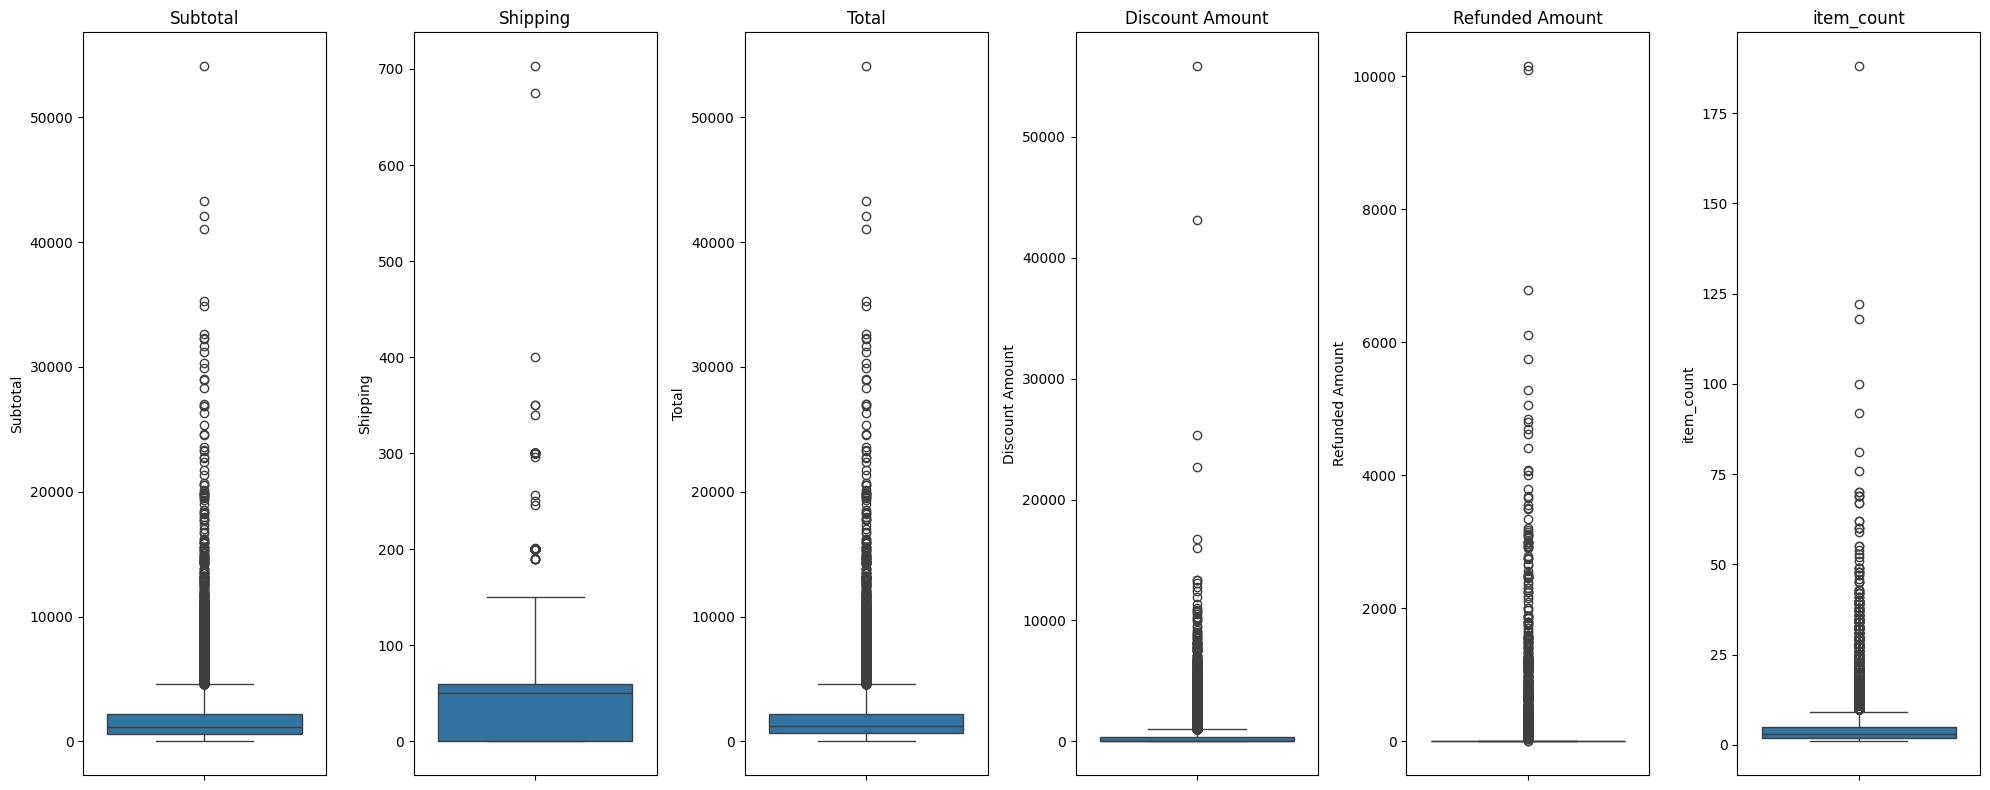

In [28]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20, 8))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i) 
    sns.boxplot(y=df[column])
    plt.title(column)
    
plt.tight_layout()
plt.show()

In [29]:
fig = sp.make_subplots(rows=1, cols=len(numerical_columns))

for i, column in enumerate(numerical_columns, 1):
    fig.add_trace(go.Box(y=df[column], name=column), row=1, col=i)

fig.update_layout(
    title_text="Boxplots of Numerical Columns",
    showlegend=False,
    height=500,
    width=2000
)

fig.show()

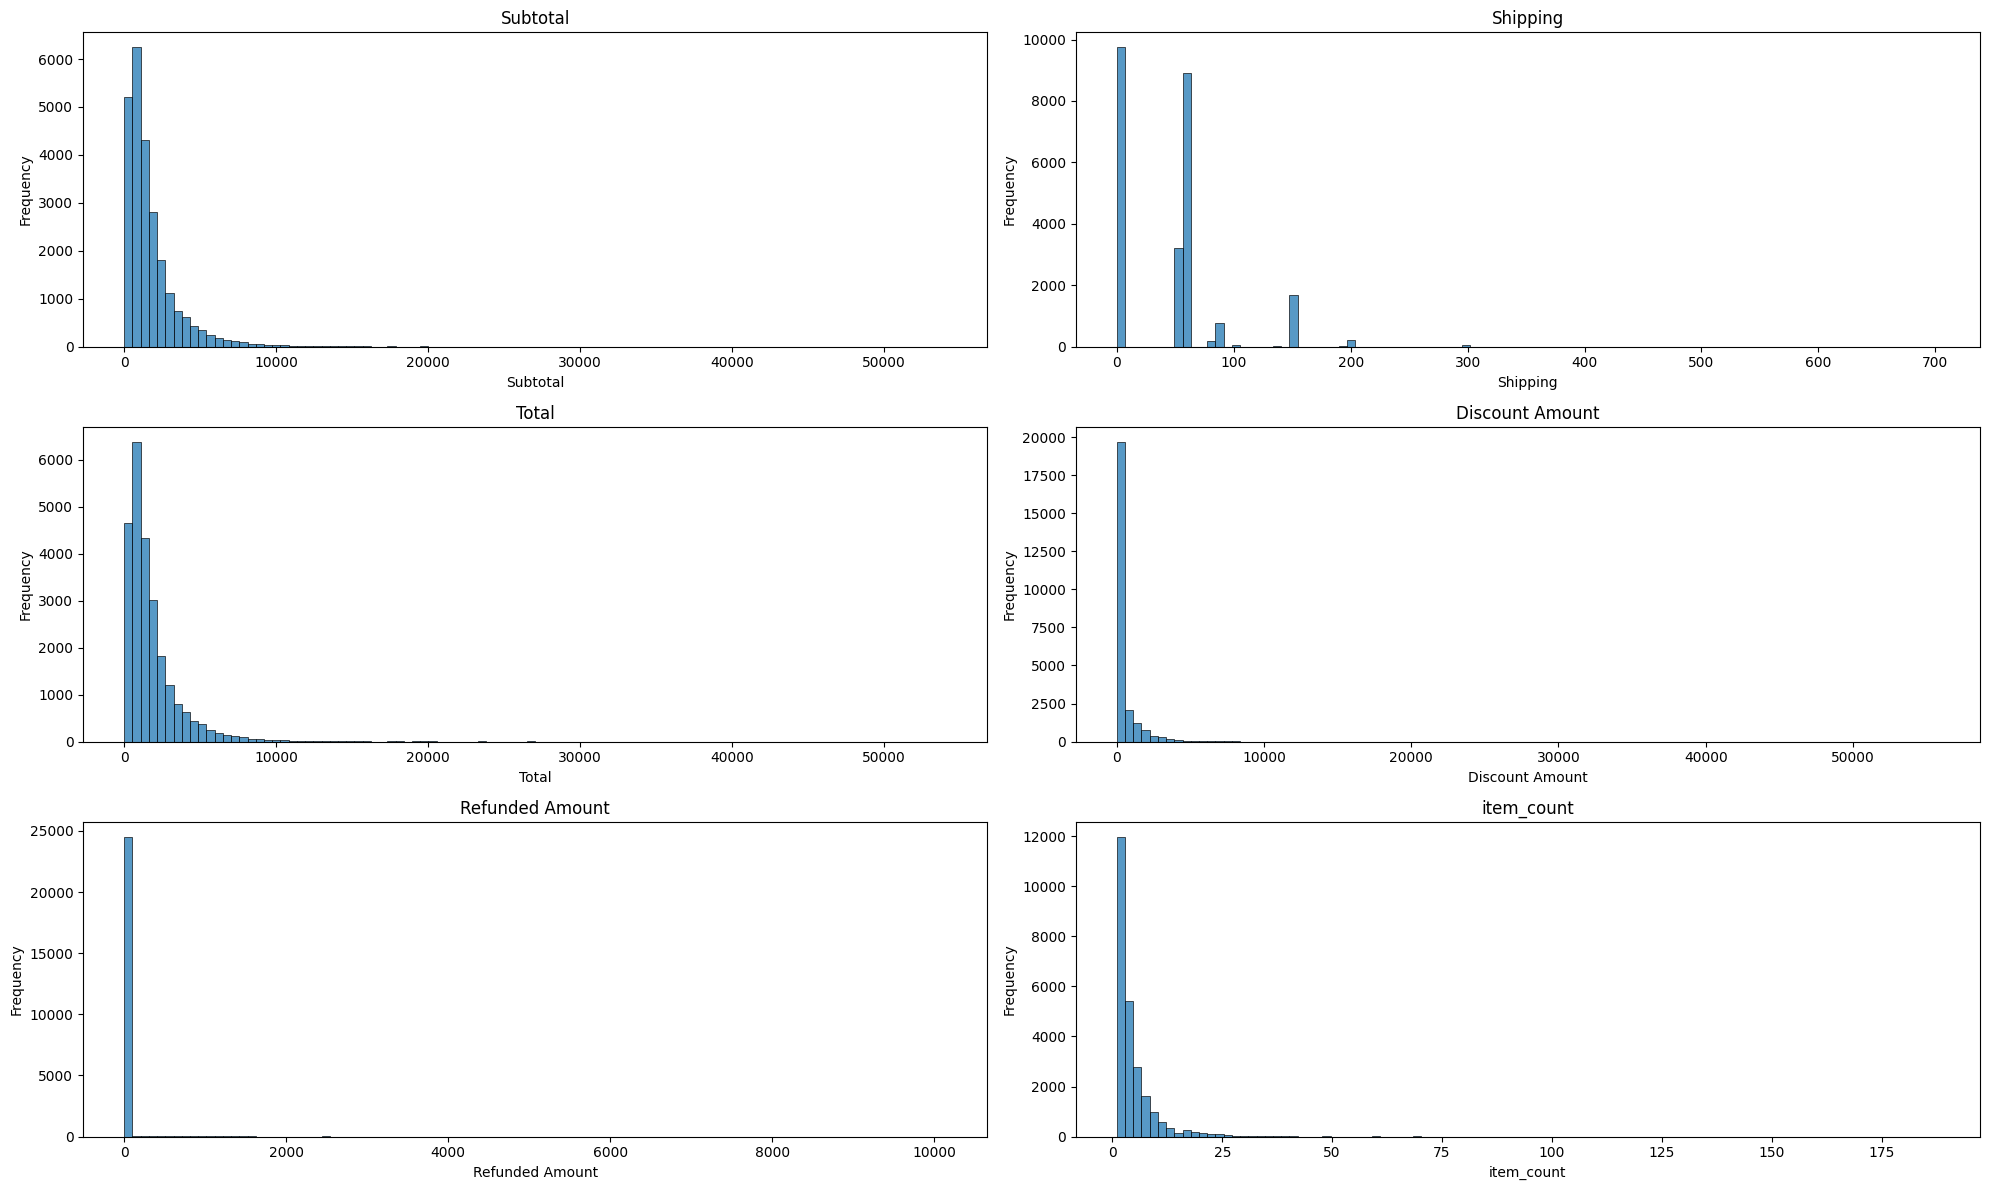

In [30]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20, 12))

num_cols = len(numerical_columns)
num_rows = (num_cols + 1) // 2 

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 2, i)  
    sns.histplot(x=df[column], bins=100)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [31]:
colors = pc.qualitative.Dark24[:len(numerical_columns)] 

fig = go.Figure()

for i, (column, color) in enumerate(zip(numerical_columns, colors)):
    fig.add_trace(
        go.Histogram(
            x=df[column], 
            name=column, 
            nbinsx=100, 
            opacity=1,
            marker_color=color,  
            visible=True if i == 0 else False  
        )
    )

dropdown_buttons = [
    {
        "label": column,
        "method": "update",
        "args": [
            {"visible": [i == j for j in range(len(numerical_columns))]},  
            {"title": f"<b>Interactive Histogram: {column}</b>"}
        ]
    }
    for i, column in enumerate(numerical_columns)
]

fig.update_layout(
    title=f"<b>Interactive Histogram: {numerical_columns[0]}</b>",
    xaxis_title="Value",
    yaxis_title="Frequency",
    updatemenus=[{
        "buttons": dropdown_buttons,
        "direction": "down",
        "showactive": True,
        "x": 1,
        "y": 1.10
    }],
    height=600,
    width=1280,
    barmode='overlay'
)

fig.show()



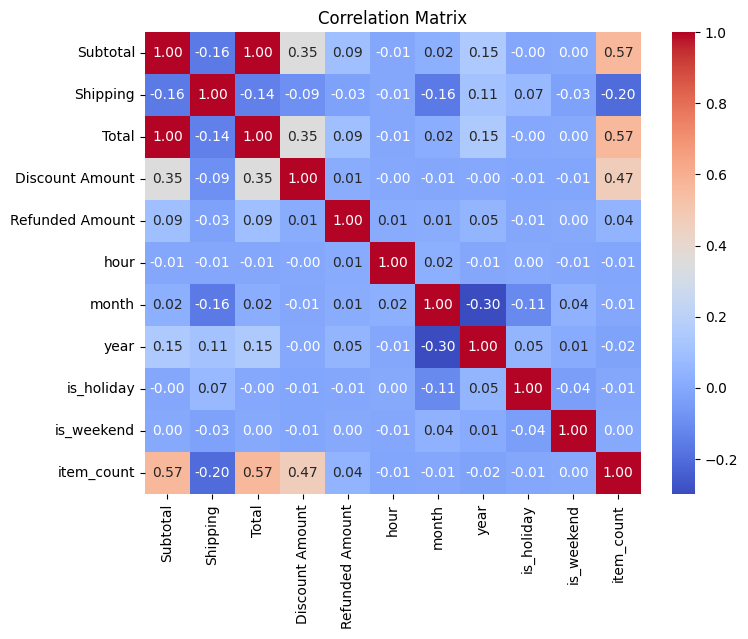

In [32]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [33]:
fig = ff.create_annotated_heatmap(
    z=corr.values, 
    x=list(corr.columns), 
    y=list(corr.index), 
    annotation_text=corr.round(2).values, 
    colorscale="tempo",
    showscale=True
)

fig.update_layout(title="Interactive Correlation Matrix", height=600, width=700)

fig.show()

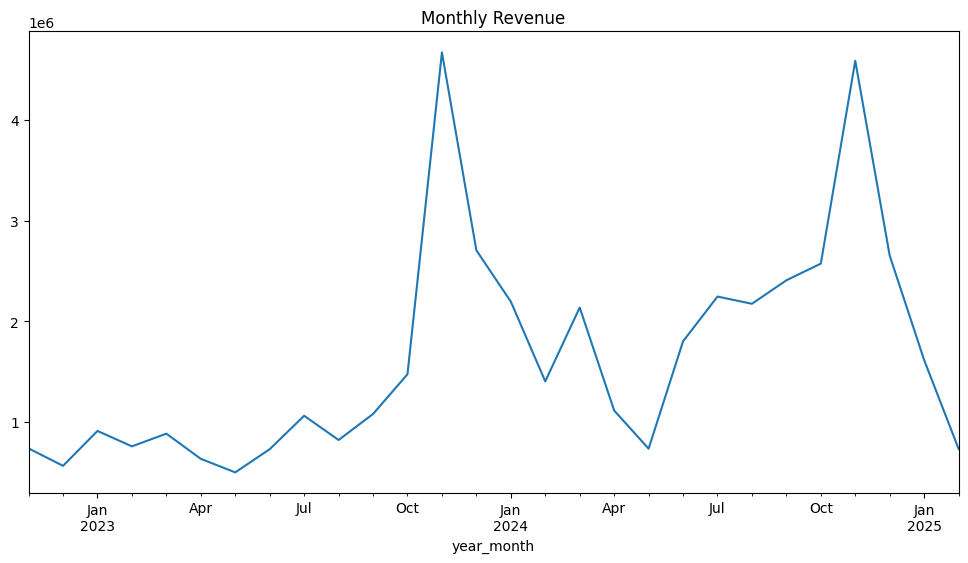

In [34]:
monthly_revenue = df.groupby('year_month')['Total'].sum()
monthly_revenue.plot(kind='line', figsize=(12, 6), title='Monthly Revenue')
plt.show()

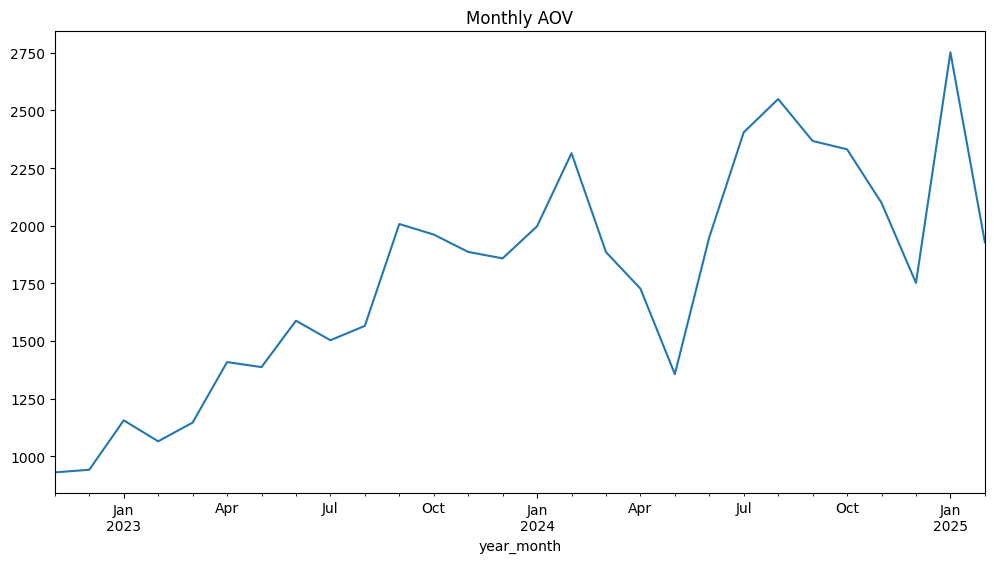

In [35]:
monthly_aov = df.groupby('year_month')['Total'].mean()
monthly_aov.plot(kind='line', figsize=(12, 6), title='Monthly AOV')
plt.show()

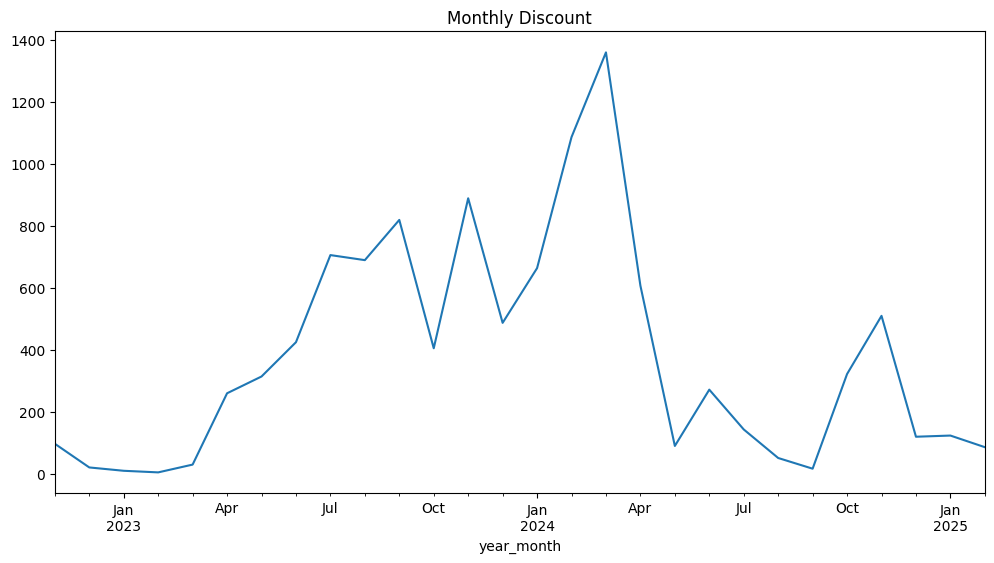

In [36]:
monthly_discount = df.groupby('year_month')['Discount Amount'].mean()
monthly_discount.plot(kind='line', figsize=(12, 6), title='Monthly Discount')
plt.show()

In [37]:
monthly_revenue.index = monthly_revenue.index.astype(str)
monthly_aov.index = monthly_aov.index.astype(str)
monthly_discount.index = monthly_discount.index.astype(str)

colors = ["blue", "green", "red"]

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=monthly_revenue.index, y=monthly_revenue, 
    mode='lines+markers', name='Monthly Revenue', 
    line=dict(color=colors[0]), visible=True
))

fig.add_trace(go.Scatter(
    x=monthly_aov.index, y=monthly_aov, 
    mode='lines+markers', name='Monthly AOV', 
    line=dict(color=colors[1]), visible=False
))

fig.add_trace(go.Scatter(
    x=monthly_discount.index, y=monthly_discount, 
    mode='lines+markers', name='Monthly Discount', 
    line=dict(color=colors[2]), visible=False
))

fig.update_layout(
    title="Monthly Metrics Overview",
    xaxis_title="Year-Month",
    yaxis_title="Value",
    height=600,
    width=900,
    hovermode="x unified",
    updatemenus=[
        {
            "buttons": [
                {"label": "Monthly Revenue", "method": "update", 
                 "args": [{"visible": [True, False, False]}, {"title": "Monthly Revenue"}]},
                {"label": "Monthly AOV", "method": "update", 
                 "args": [{"visible": [False, True, False]}, {"title": "Monthly AOV"}]},
                {"label": "Monthly Discount", "method": "update", 
                 "args": [{"visible": [False, False, True]}, {"title": "Monthly Discount"}]},
            ],
            "direction": "down",
            "showactive": True
        }
    ]
)

fig.show()


Lineitem name
Plain Towels 500GSM - 30x30 / Off White    980
Pillow Protector - WHITE / 50*70           833
Plain Towels 500GSM - 30x30 / Grey         824
Plain Towels 500GSM - 30x30 / White        813
Plain Towels 500GSM - 30x30 / Coffee       664
Pillow Protector - GREY / 50*70            663
Plain Towels 500GSM - 30x30 / Mint         634
Golden Christmas Hand Towel                566
Mattress Protector - 180x200 / White       520
Olivia Kitchen Towel 30x50cm - Coffee      503
Olivia Kitchen Towel 30x50cm - Navy        499
Mattress Protector - 120x200 / White       477
Plain Towels 500GSM - 30x30 / Navy         474
Mattress Protector - 160x200 / White       470
Diamond Towel - 30x30 / Off White          460
Hollow Fiber Pillow - 1000gm               459
Waffle Towel - 30x30 / Navy                459
Waffle Towel - 30x30 / Off White           458
Mattress Protector - 180x200 / Grey        445
Waffle Towel - 30x30 / Mint                444
Name: Lineitem quantity, dtype: int64

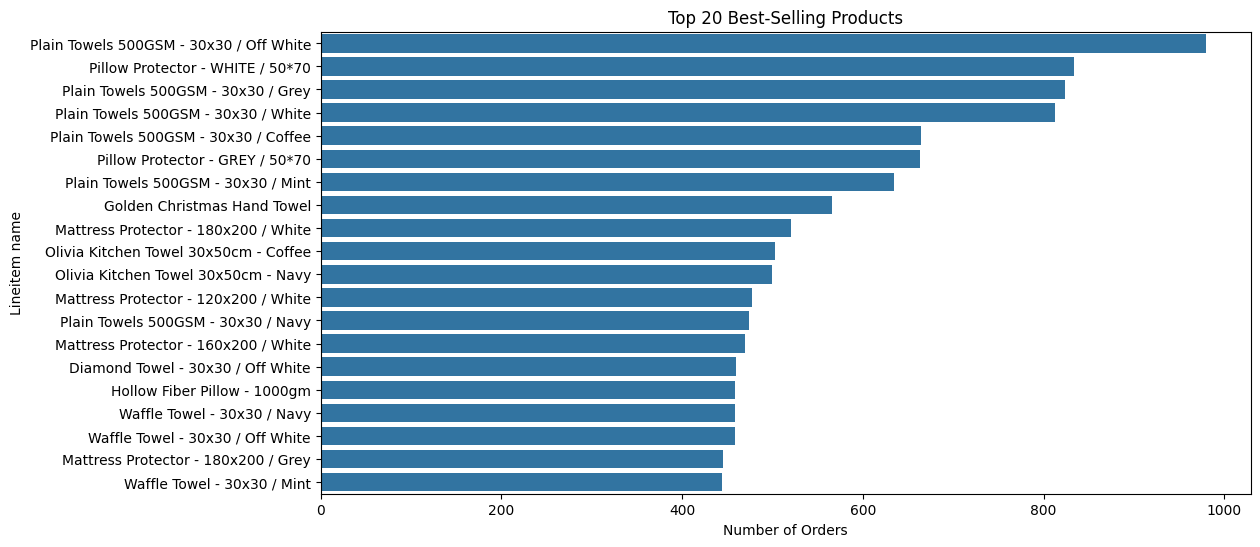

In [38]:
all_products = df['Lineitem name'].explode()
all_products = pd.concat([all_products,df['Lineitem quantity'].explode()],axis=1)
all_products['Lineitem quantity'] = pd.to_numeric(all_products['Lineitem quantity'], errors='coerce')

top_products = all_products.groupby('Lineitem name')['Lineitem quantity'].sum().sort_values(ascending=False).head(20)
    

plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 20 Best-Selling Products')
plt.xlabel('Number of Orders')
top_products

In [39]:
all_products = df['Lineitem name'].explode()
all_products = pd.concat([all_products, df['Lineitem quantity'].explode()], axis=1)

all_products['Lineitem quantity'] = pd.to_numeric(all_products['Lineitem quantity'], errors='coerce')

top_products = all_products.groupby('Lineitem name')['Lineitem quantity'].sum().sort_values(ascending=False).head(20)

fig = px.bar(
    top_products, 
    x=top_products.values, 
    y=top_products.index, 
    orientation='h',
    title="Top 20 Best-Selling Products",
    labels={'x': 'Number of Orders', 'y': 'Product Name'},
    text=top_products.values,
)

fig.update_layout(
    xaxis_title="Number of Orders", 
    yaxis_title="Product Name", 
    height=600, 
    width=900,
    yaxis={'categoryorder':'total ascending'}
)

fig.update_traces(marker_color='royalblue', textposition='outside')

fig.show()

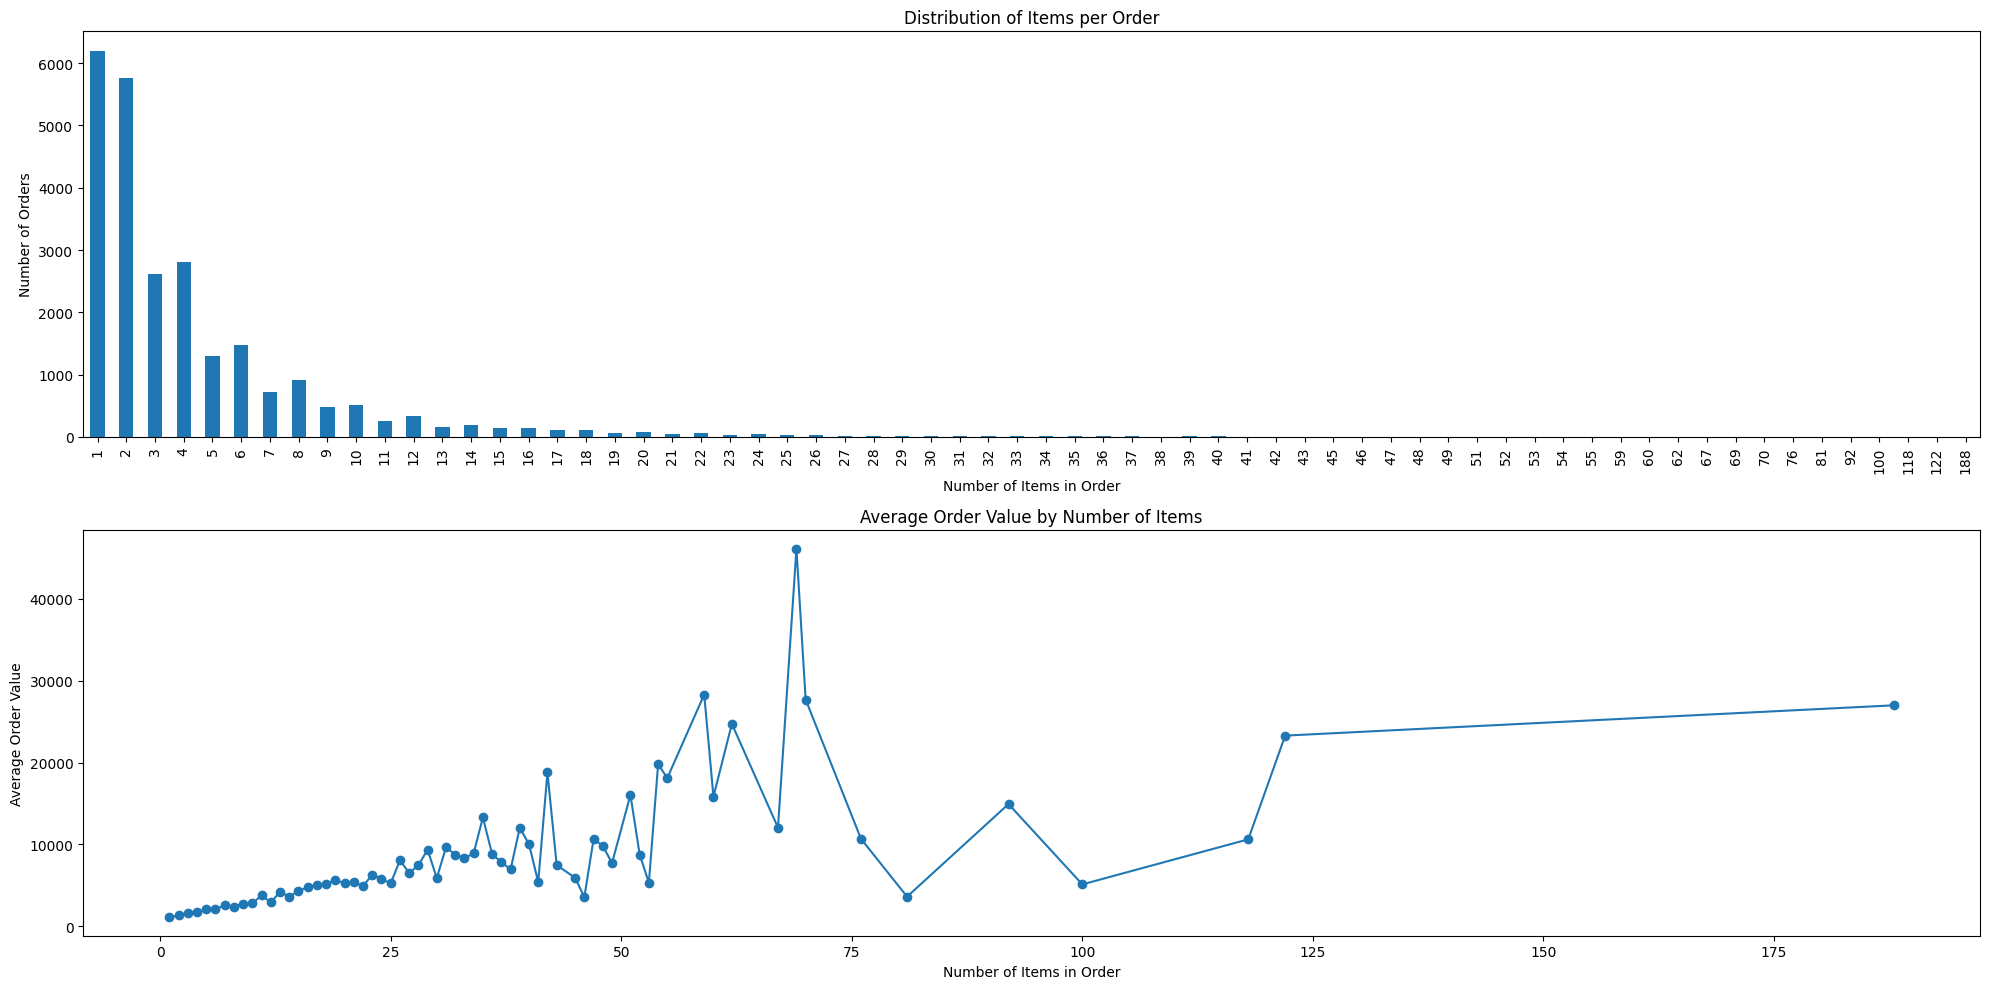


Order Size Summary:
Most common order size: 1 items
Average order size: 4.47 items
Maximum items in an order: 188
Minimum items in an order: 1


In [40]:
plt.figure(figsize=(20, 10))
# Distribution of order sizes
plt.subplot(2, 1, 1)
df['item_count'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Items per Order')
plt.xlabel('Number of Items in Order')
plt.ylabel('Number of Orders')

# Average order value by number of items
plt.subplot(2, 1, 2)
avg_order_value = df.groupby('item_count')['Total'].mean()
avg_order_value.plot(kind='line', marker='o')
plt.title('Average Order Value by Number of Items')
plt.xlabel('Number of Items in Order')
plt.ylabel('Average Order Value')

plt.tight_layout()
plt.show()

# Summary statistics
print("\nOrder Size Summary:")
print(f"Most common order size: {df['item_count'].mode().values[0]} items")
print(f"Average order size: {df['item_count'].mean():.2f} items")
print(f"Maximum items in an order: {df['item_count'].max()}")
print(f"Minimum items in an order: {df['item_count'].min()}")



In [41]:
order_size_counts = df['item_count'].value_counts().sort_index()

avg_order_value = df.groupby('item_count')['Total'].mean()

fig = sp.make_subplots(
    rows=2, cols=1, 
    subplot_titles=["Distribution of Items per Order", "Average Order Value by Number of Items"]
)

fig.add_trace(
    go.Bar(x=order_size_counts.index, y=order_size_counts.values, name="Order Size Distribution"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=avg_order_value.index, y=avg_order_value.values, mode='lines+markers', name="Average Order Value"),
    row=2, col=1
)

fig.update_layout(
    height=800, width=1280, 
    title_text="Order Size and Value Analysis",
    xaxis_title="Number of Items in Order",
    yaxis_title="Number of Orders",
    showlegend=False
)

fig.show()

print("\nOrder Size Summary:")
print(f"Most common order size: {df['item_count'].mode().values[0]} items")
print(f"Average order size: {df['item_count'].mean():.2f} items")
print(f"Maximum items in an order: {df['item_count'].max()}")
print(f"Minimum items in an order: {df['item_count'].min()}")


Order Size Summary:
Most common order size: 1 items
Average order size: 4.47 items
Maximum items in an order: 188
Minimum items in an order: 1


In [42]:
day_analysis = df.groupby('day_type').agg({
    'Total': ['count', 'mean', 'sum'],
    'item_count': ['sum'] 
}).round(2)

day_analysis.columns = ['count', 'mean', 'sum', 'items_count']

day_analysis = day_analysis.reindex(['Holiday', 'Weekday', 'Weekend'])

print("\nSales Analysis by Day Type:")
print(day_analysis)


print("\nItem Analysis:")
print(f"Average items per order: {df['item_count'].mean():.2f}")
print(f"Maximum items in an order: {df['item_count'].max()}")
print(f"Minimum items in an order: {df['item_count'].min()}")


Sales Analysis by Day Type:
          count     mean          sum  items_count
day_type                                          
Holiday     843  1804.65   1521319.14         3610
Weekday   16740  1839.30  30789799.99        74769
Weekend    7273  1858.90  13519792.57        32605

Item Analysis:
Average items per order: 4.47
Maximum items in an order: 188
Minimum items in an order: 1


In [43]:

yearly_orders = df.groupby('year').agg({
    'Name': 'count',
    'Total': 'sum'
}).rename(columns={'Name': 'order_count'})

seasonal_analysis = df.groupby('season',observed=False).agg({
    'Name': 'count',
    'Total': ['mean', 'sum'],
})
seasonal_orders = df.groupby(['year', 'season'],observed=False)['Total'].sum().unstack()


monthly_trend = df.groupby('year_month').agg({
    'Name': 'count',
    'Total': 'sum'
})

province_yearly = df.groupby(['year', 'Shipping Province Name']).agg({
    'Name': 'count',
    'Total': 'sum'
})

pivot_province = province_yearly.reset_index().pivot(
    index='Shipping Province Name', 
    columns='year', 
    values='Total'
)



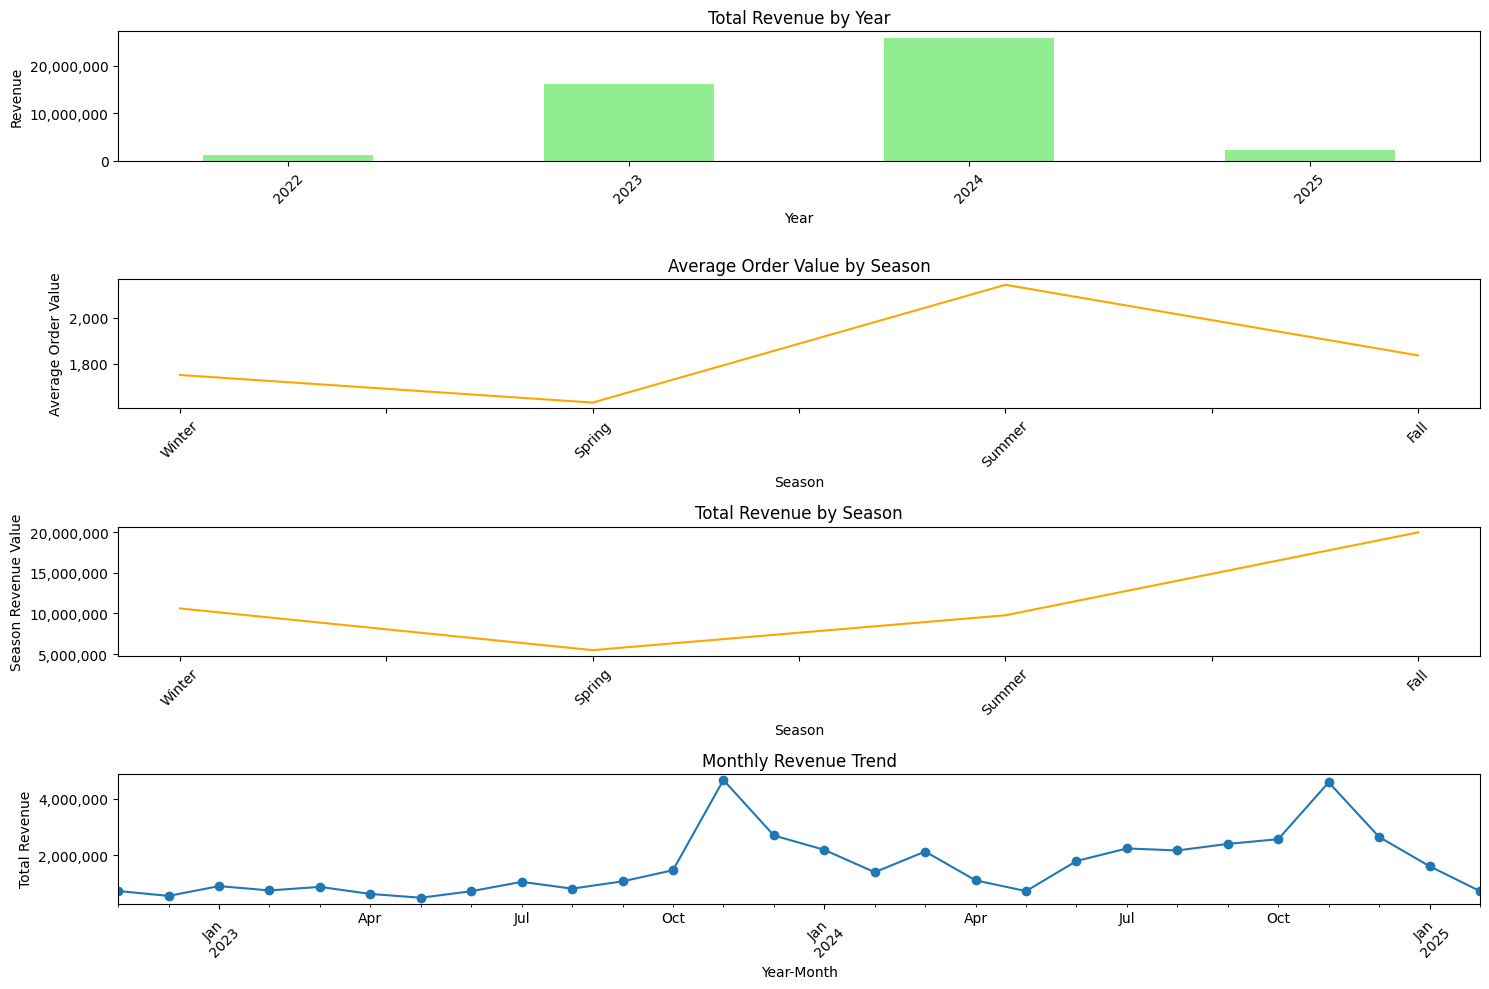

In [44]:
plt.figure(figsize=(15, 10))

# Yearly revenue subplot
plt.subplot(4, 1, 1)
ax1 = yearly_orders['Total'].plot(kind='bar', y='Total', color='lightgreen')
plt.title('Total Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Revenue')
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(rotation=45)

#  Seasonal Analysis
plt.subplot(4, 1, 2)
ax2 = seasonal_analysis['Total']['mean'].plot(kind='line',y='mean', color='orange')
plt.title('Average Order Value by Season')
plt.xlabel('Season')
plt.ylabel('Average Order Value')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(rotation=45)

#  Seasonal Analysis
plt.subplot(4, 1, 3)
ax3 = seasonal_analysis['Total']['sum'].plot(kind='line',y='sum', color='orange')
plt.title('Total Revenue by Season')
plt.xlabel('Season')
plt.ylabel('Season Revenue Value')
ax3.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(rotation=45)

#  Monthly Trend
plt.subplot(4,1, 4)
ax4 = monthly_trend['Total'].plot(kind='line', marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
ax4.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



In [45]:
yearly_orders.index = yearly_orders.index.astype(str)
seasonal_analysis.index = seasonal_analysis.index.astype(str)
monthly_trend.index = monthly_trend.index.astype(str)

fig = sp.make_subplots(
    rows=4, cols=1, 
    subplot_titles=[
        "Total Revenue by Year",
        "Average Order Value by Season",
        "Total Revenue by Season",
        "Monthly Revenue Trend"
    ],
    vertical_spacing=0.15
)

fig.add_trace(
    go.Bar(x=yearly_orders.index, y=yearly_orders['Total'], marker_color="lightgreen", name="Total Revenue"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=seasonal_analysis.index, y=seasonal_analysis['Total']['mean'], 
               mode='lines+markers', line=dict(color="orange"), name="Avg Order Value"),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=seasonal_analysis.index, y=seasonal_analysis['Total']['sum'], 
               mode='lines+markers', line=dict(color="red"), name="Total Revenue"),
    row=3, col=1
)

fig.add_trace(
    go.Scatter(x=monthly_trend.index, y=monthly_trend['Total'], 
               mode='lines+markers', line=dict(color="blue"), name="Monthly Revenue"),
    row=4, col=1
)

fig.update_layout(
    height=1000, width=1280, 
    title="Revenue & Seasonal Analysis",
    showlegend=False,  
    xaxis4=dict(title="Year-Month"),
    xaxis3=dict(title="Season"),
    xaxis2=dict(title="Season"),
    xaxis1=dict(title="Year"),
    yaxis1=dict(title="Revenue"),
    yaxis2=dict(title="Average Order Value"),
    yaxis3=dict(title="Total Revenue"),
    yaxis4=dict(title="Total Revenue"),
)

fig.show()

<Figure size 1500x1000 with 0 Axes>

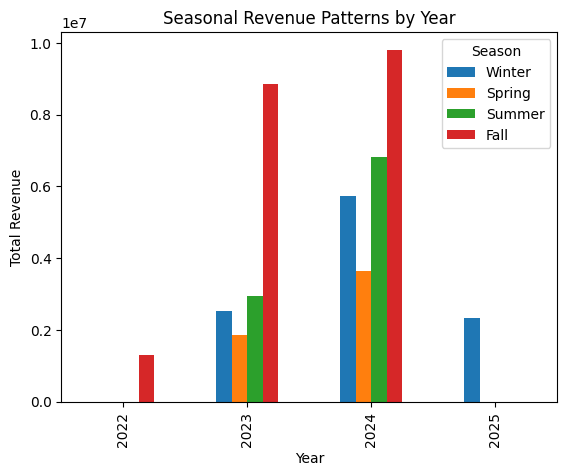

In [46]:
plt.figure(figsize=(15,10))


seasonal_orders.plot(kind='bar')
plt.title('Seasonal Revenue Patterns by Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.legend(title='Season')

plt.show()

In [47]:
seasonal_orders.index = seasonal_orders.index.astype(str)

fig = px.bar(
    seasonal_orders, 
    x=seasonal_orders.index, 
    y=seasonal_orders.columns,  
    title="Seasonal Revenue Patterns by Year",
    labels={"value": "Total Revenue", "variable": "Season", "x": "Year"},
    barmode="group"
)

fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Total Revenue",
    legend_title="Season",
    height=600,
    width=900
)

fig.show()

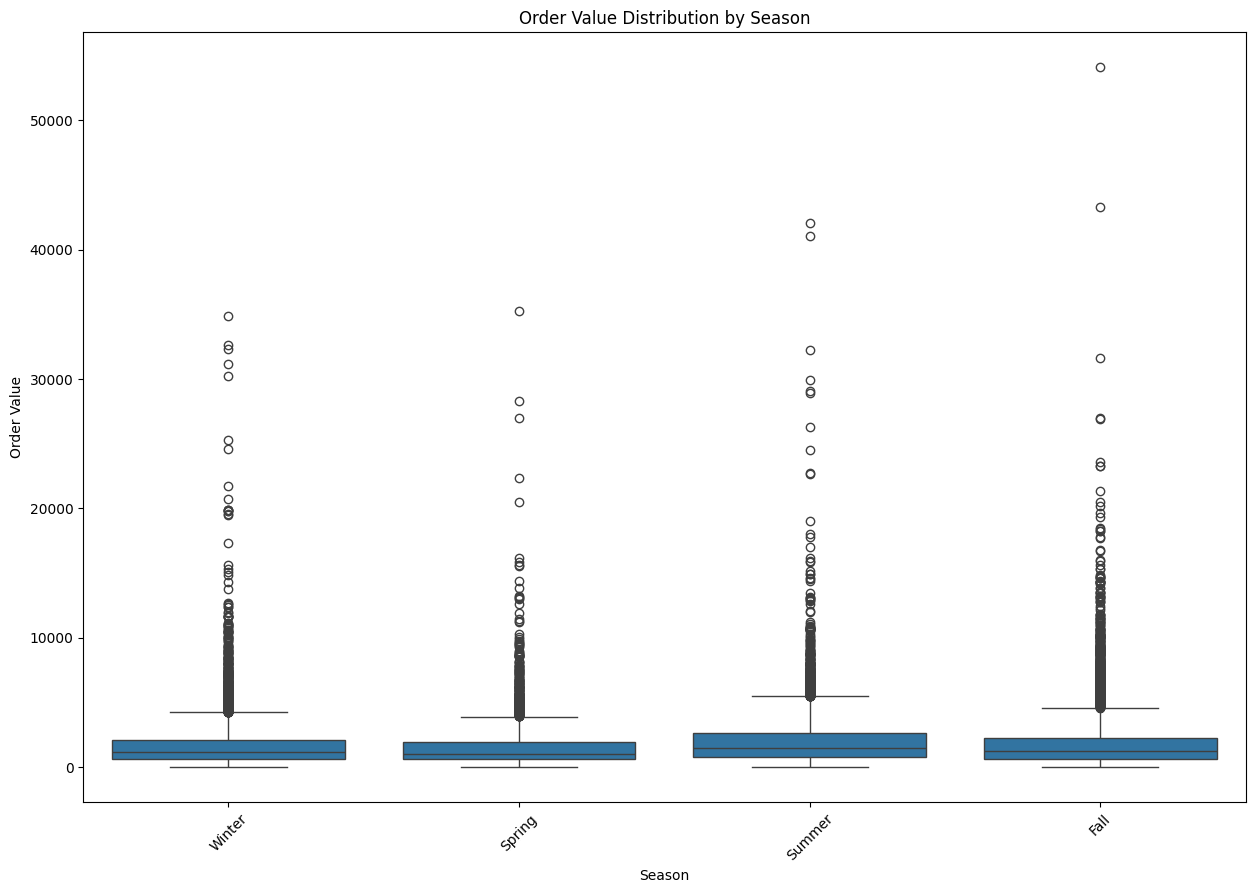

In [48]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x='season', y='Total')
plt.title('Order Value Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Order Value')
plt.xticks(rotation=45)

plt.show()

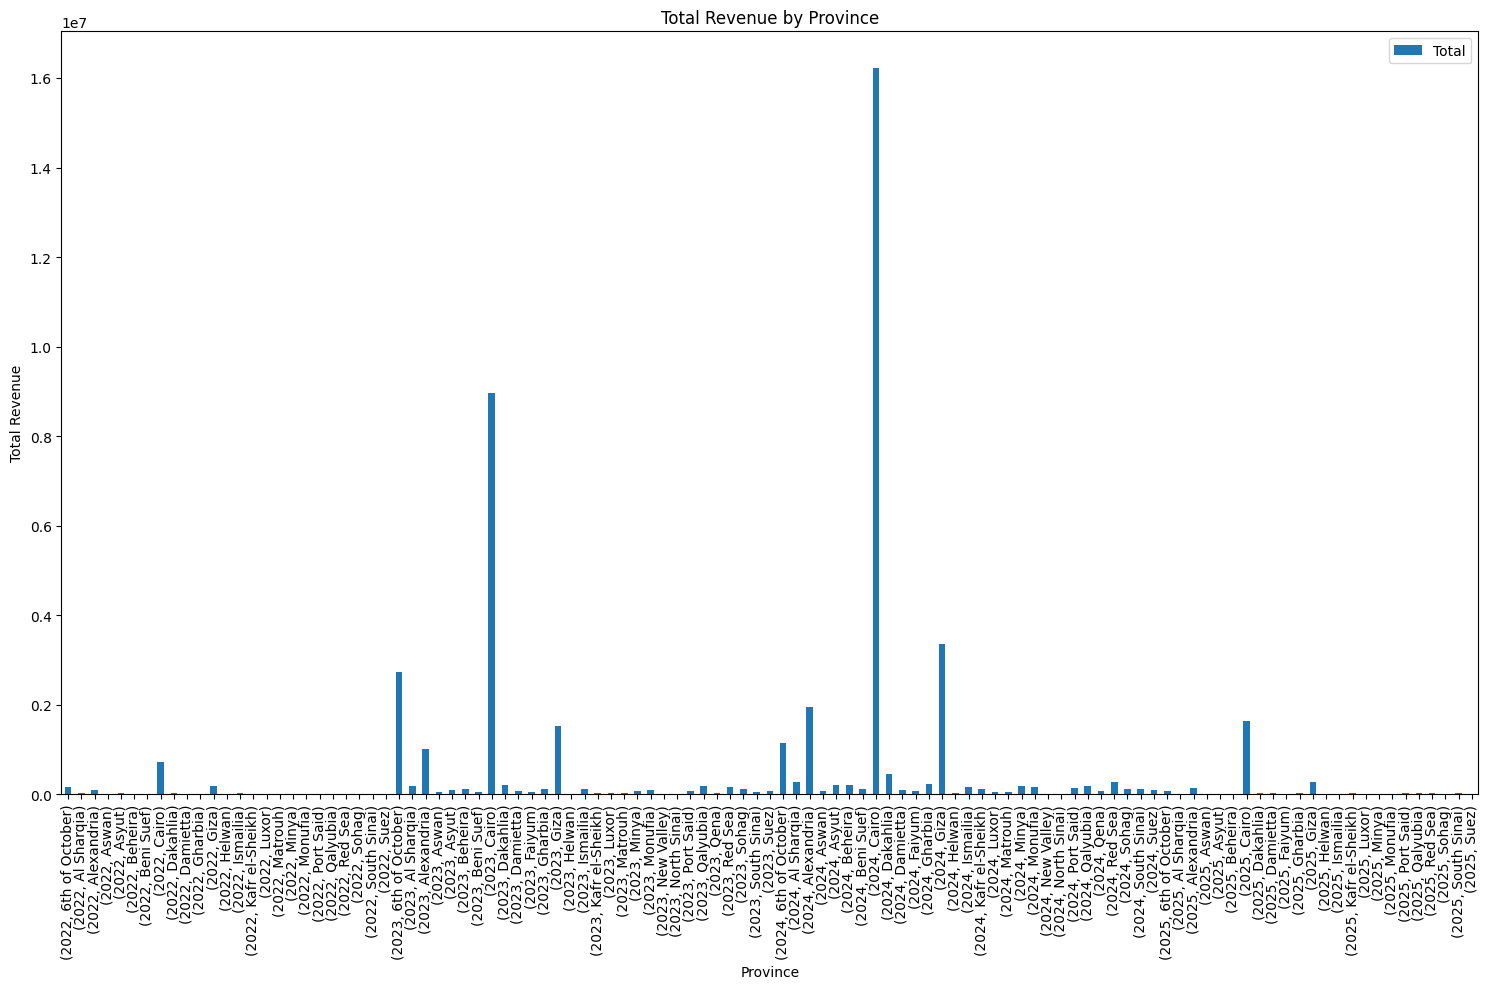

In [49]:
province_yearly.plot(kind='bar', y='Total', figsize=(15, 10))
plt.title('Total Revenue by Province')
plt.xlabel('Province')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

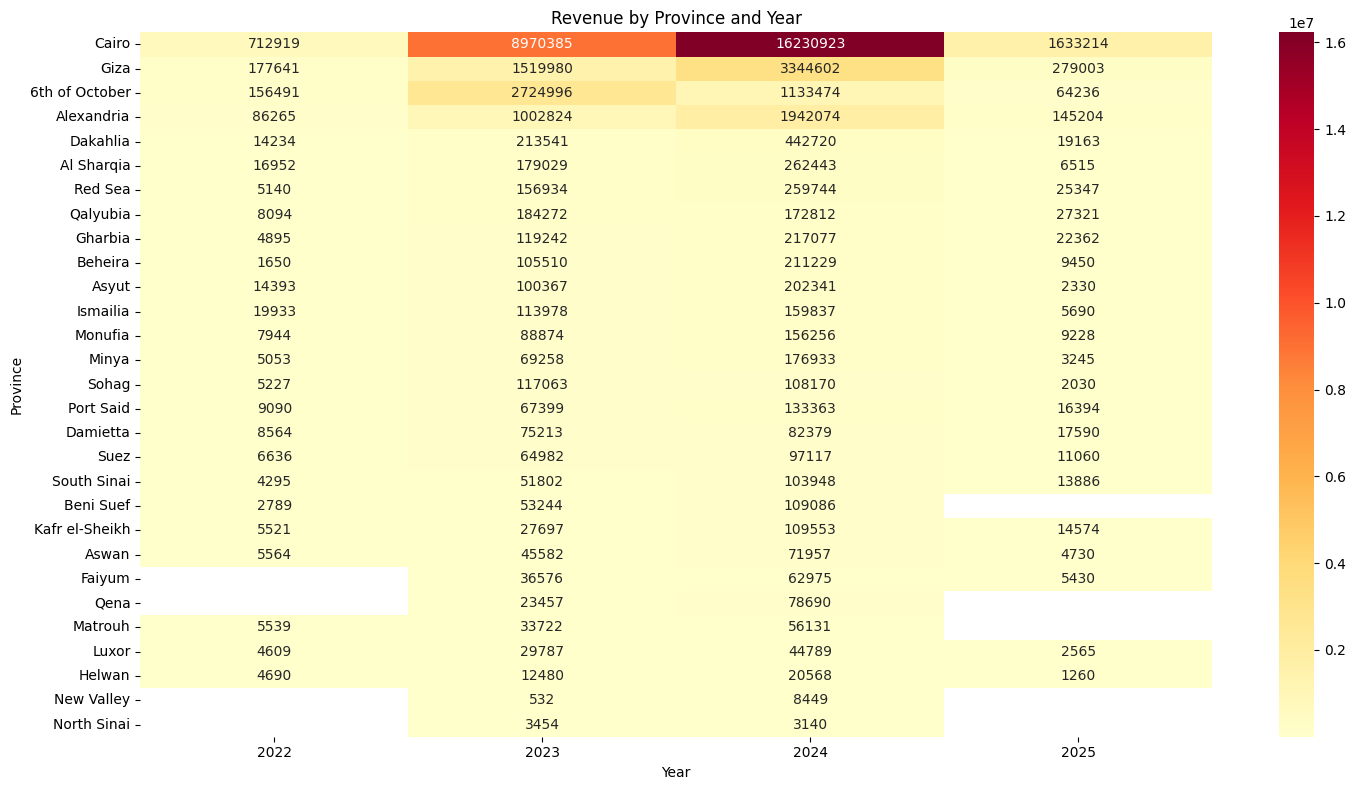

In [50]:

plt.figure(figsize=(15, 8))
province_totals = pivot_province.sum(axis=1).sort_values(ascending=False)
pivot_province_sorted = pivot_province.reindex(province_totals.index)
sns.heatmap(pivot_province_sorted, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Revenue by Province and Year')
plt.xlabel('Year')
plt.ylabel('Province')
plt.tight_layout()
plt.show()


In [51]:
yoy_growth = ((yearly_orders - yearly_orders.shift(1)) / yearly_orders.shift(1)) * 100

mom_growth = ((monthly_trend - monthly_trend.shift(1)) / monthly_trend.shift(1)) * 100



product_prices = []
for idx, row in df.iterrows():
    year = row['Created at'].year
    for price, product in zip(row['Lineitem price'], row['Lineitem name']):
        product_prices.append({
            'year': year,
            'product': product,
            'price': price
        })

product_df = pd.DataFrame(product_prices)

yearly_prices = product_df.groupby(['year', 'product'])['price'].mean().reset_index()

price_pivot = yearly_prices.pivot(index='product', columns='year', values='price')

yoy_changes = pd.DataFrame()
for year in range(price_pivot.columns.min()+1, price_pivot.columns.max()+1):
    
    yoy = ((price_pivot[year] - price_pivot[year-1]) / price_pivot[year-1] * 100)

    yoy = yoy.replace([np.inf, -np.inf], np.nan)
    yoy_changes[f'{year}_YoY%'] = yoy

    

final_analysis = pd.concat([price_pivot, yoy_changes], axis=1)

final_analysis = final_analysis.sort_index()




yoy_changes['Avg_Change'] = yoy_changes.abs().mean(axis=1)
print("\nOverall Price Change Statistics:")
for year in yoy_changes.columns:
    if year != 'Avg_Change':
        print(f"\nYear {year}:")
        print(f"Average Change: {yoy_changes[year].mean():.2f}%")
        print(f"Median Change: {yoy_changes[year].median():.2f}%")
        print(f"Max Increase: {yoy_changes[year].max():.2f}%")
        print(f"Max Decrease: {yoy_changes[year].min():.2f}%")





Overall Price Change Statistics:

Year 2023_YoY%:
Average Change: 47.49%
Median Change: 28.38%
Max Increase: 351.11%
Max Decrease: -53.89%

Year 2024_YoY%:
Average Change: 28.42%
Median Change: 17.65%
Max Increase: 224.66%
Max Decrease: -46.37%

Year 2025_YoY%:
Average Change: -1.24%
Median Change: 0.00%
Max Increase: 104.55%
Max Decrease: -74.29%


In [52]:
print("\nSummary Statistics of Year-over-Year Price Changes:")
yoy_changes.describe()


Summary Statistics of Year-over-Year Price Changes:


2023_YoY%   2024_YoY%   2025_YoY%   Avg_Change
count  454.000000  607.000000  333.000000  1249.000000
mean    47.490116   28.418311   -1.242612    38.105332
std     64.932949   43.237484   36.405764    37.280631
min    -53.887181  -46.372240  -74.285714     0.000000
25%      0.000000   -1.110191  -32.145305    11.461582
50%     28.375365   17.647059    0.000000    27.365963
75%     83.048981   52.810248   25.585023    50.651314
max    351.111111  224.658003  104.545455   265.151786

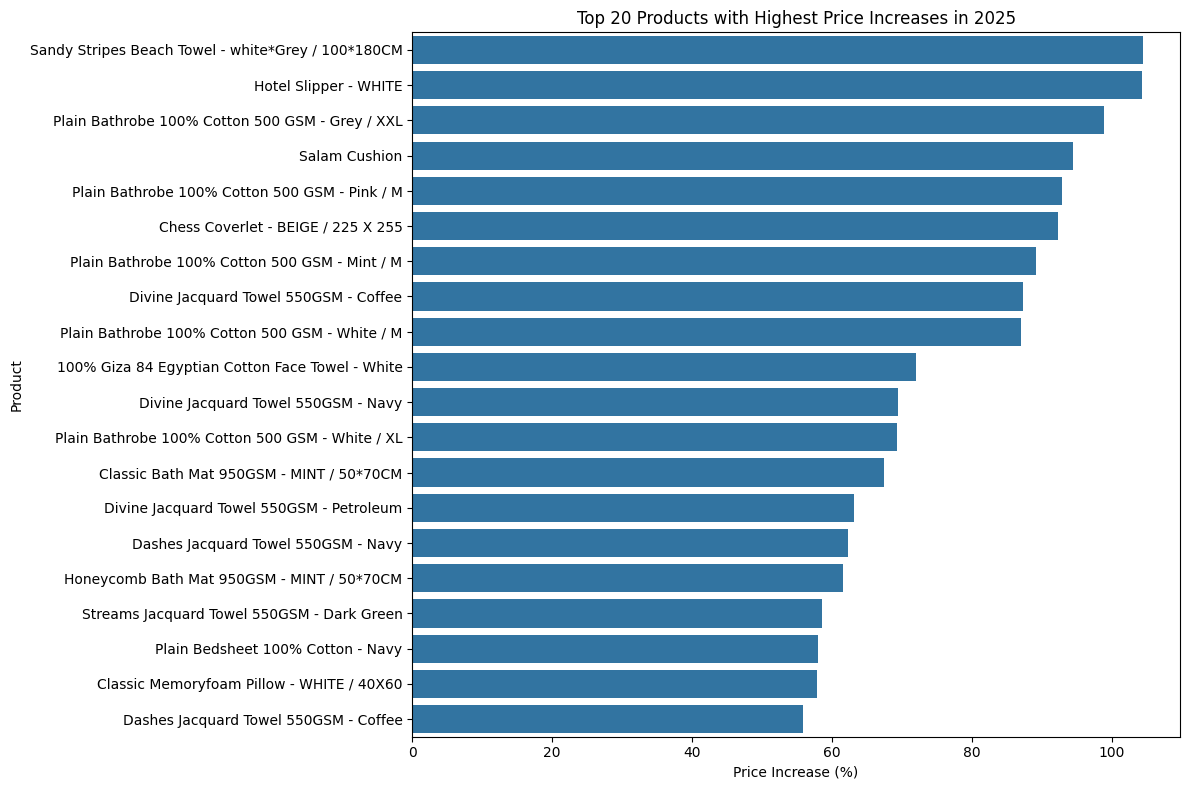

In [53]:
plt.figure(figsize=(12,8))

latest_year = f'{price_pivot.columns.max()}_YoY%'
top_20_increases = yoy_changes[latest_year].sort_values(ascending=False).head(20)

sns.barplot(x=top_20_increases.values, y=top_20_increases.index)
plt.title(f'Top 20 Products with Highest Price Increases in {price_pivot.columns.max()}')
plt.xlabel('Price Increase (%)')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

In [54]:
latest_year = f'{price_pivot.columns.max()}_YoY%'

top_20_increases = yoy_changes[latest_year].sort_values(ascending=False).head(20)

fig = px.bar(
    x=top_20_increases.values,
    y=top_20_increases.index,  
    orientation="h",  
    title=f"Top 20 Products with Highest Price Increases in {price_pivot.columns.max()}",
    labels={"x": "Price Increase (%)", "y": "Product"},
    color=top_20_increases.values, 
    color_continuous_scale="Reds"
)

fig.update_layout(
    xaxis_title="Price Increase (%)",
    yaxis_title="Product",
    height=600,
    width=900,
    yaxis=dict(categoryorder="total ascending")
)

fig.show()


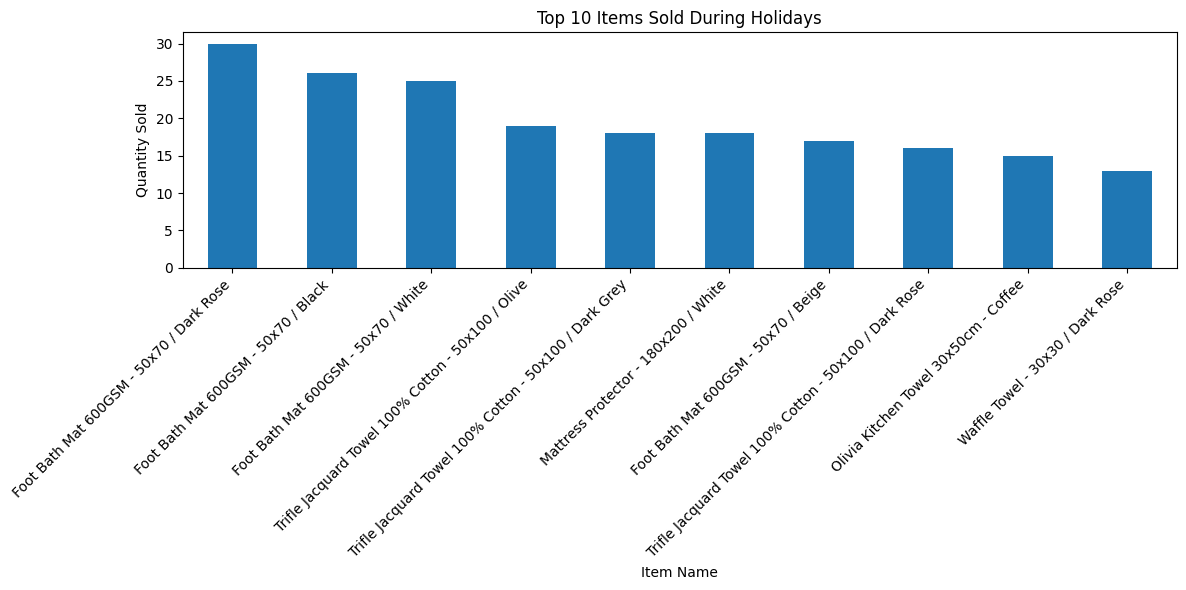

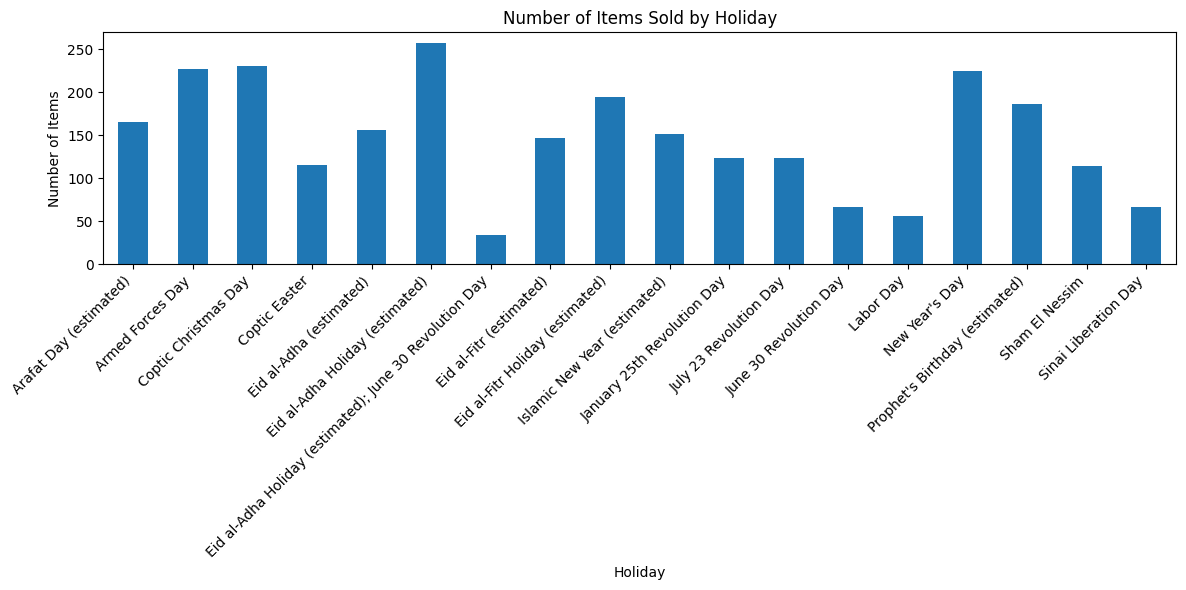

In [55]:
if df['is_holiday'].any():
    holiday_items = []
    
    # Process each holiday order
    holiday_orders = df[df['is_holiday']]
    for _, row in holiday_orders.iterrows():
        items = row['Lineitem name']
        prices = row['Lineitem price']
        holiday = row['holiday_name']

        for item, price in zip(items, prices):
            holiday_items.append({
                'holiday': holiday,
                'item': item.strip(),
                'price': float(price),
                'date': row['Created at']
            })
    
    holiday_items_df = pd.DataFrame(holiday_items)
    

    holiday_analysis = holiday_items_df.groupby(['holiday', 'item']).agg({
        'item': 'count',
        'price': ['mean', 'sum']
    }).round(2)
    
    holiday_analysis.columns = ['quantity_sold', 'avg_price', 'total_revenue']
    

    
    # Top items sold during holidays
    top_holiday_items = holiday_items_df.groupby('item')['item'].count().sort_values(ascending=False).head(10)
    
    plt.figure(figsize=(12, 6))
    top_holiday_items.plot(kind='bar')
    plt.title('Top 10 Items Sold During Holidays')
    plt.xlabel('Item Name')
    plt.ylabel('Quantity Sold')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Sales distribution by holiday
    plt.figure(figsize=(12, 6))
    holiday_items_df.groupby('holiday')['item'].count().plot(kind='bar')
    plt.title('Number of Items Sold by Holiday')
    plt.xlabel('Holiday')
    plt.ylabel('Number of Items')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [56]:
if df['is_holiday'].any():
    holiday_items = []

    holiday_orders = df[df['is_holiday']]
    for _, row in holiday_orders.iterrows():
        items = row['Lineitem name']
        prices = row['Lineitem price']
        holiday = row['holiday_name']

        for item, price in zip(items, prices):
            holiday_items.append({
                'holiday': holiday,
                'item': item.strip(),
                'price': float(price),
                'date': row['Created at']
            })

    holiday_items_df = pd.DataFrame(holiday_items)

    holiday_analysis = holiday_items_df.groupby(['holiday', 'item']).agg({
        'item': 'count',
        'price': ['mean', 'sum']
    }).round(2)
    
    holiday_analysis.columns = ['quantity_sold', 'avg_price', 'total_revenue']

    top_holiday_items = holiday_items_df.groupby('item')['item'].count().sort_values(ascending=False).head(10)
    fig1 = px.bar(
        x=top_holiday_items.index,
        y=top_holiday_items.values,
        title="Top 10 Items Sold During Holidays",
        labels={"x": "Item Name", "y": "Quantity Sold"},
        color=top_holiday_items.values,
        color_continuous_scale="Blues"
    )
    fig1.update_layout(xaxis_tickangle=-45, height=500, width=1280)
    fig1.show()

    holiday_sales = holiday_items_df.groupby('holiday')['item'].count()
    fig2 = px.bar(
        x=holiday_sales.index,
        y=holiday_sales.values,
        title="Number of Items Sold by Holiday",
        labels={"x": "Holiday", "y": "Number of Items"},
        color=holiday_sales.values,
        color_continuous_scale="Oranges"
    )
    fig2.update_layout(xaxis_tickangle=-45, height=500, width=1280)
    fig2.show()

Text(0, 0.5, 'Frequency')

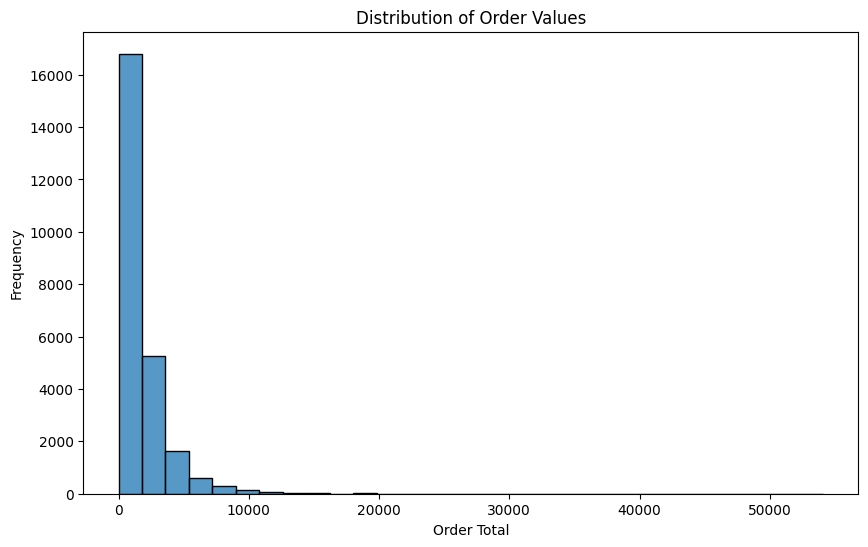

In [57]:
plt.figure(figsize=(10,6))
sns.histplot(df['Subtotal'], bins=30)
plt.title('Distribution of Order Values')
plt.xlabel('Order Total')
plt.ylabel('Frequency')

In [58]:
fig = px.histogram(
    df, 
    x="Subtotal", 
    nbins=30, 
    title="Distribution of Order Values", 
    labels={"Subtotal": "Order Total", "count": "Frequency"}, 
    color_discrete_sequence=["royalblue"]
)

fig.update_layout(
    bargap=0.1,
    height=500, width=800
)

fig.show()